In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#reading the New York taxi data
df = pd.read_csv('/Users/asadmolayari/Desktop/my_courses/pytorch/Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [13]:
#value to predict, fare_class is 0 if less than $10. It's 1 otherwise.
df['fare_class'].value_counts()

0    80000
1    40000
Name: fare_class, dtype: int64

In [15]:
def haversine_distance(df, lat1, long1, lat2, long2):  #Calculating the distance bw two points on a sphere using lat and longs
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [16]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [175]:
#extracting datetime some features
df['EDT'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours = 4)
df['hour'] = df['EDT'].dt.hour
df['am_pm'] = np.where(df['hour']>12, 'pm', 'am')
df['weekday'] = df['EDT'].dt.strftime("%a")
df['day_of_month']=df['EDT'].dt.strftime("%d")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDT,hour,am_pm,weekday,day_of_month
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,am,Mon,19
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,am,Sat,17
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,am,Sat,17
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,pm,Sun,11
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,pm,Fri,16


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
EDT                  120000 non-null datetime64[ns]
hour                 120000 non-null int64
am_pm                120000 non-null object
weekday              120000 non-null object
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 11.9+ MB


In [176]:
#checking on the categorical data
cat_col = ['hour', 'am_pm', 'weekday', 'day_of_month']
cont_col = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_class']  # this column contains the labels

In [177]:
# Convert our three categorical columns to category dtypes.
for cat in cat_col:
    df[cat] = df[cat].astype('category')

In [178]:
df.dtypes

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDT                  datetime64[ns]
hour                       category
am_pm                      category
weekday                    category
day_of_month               category
dtype: object

In [179]:
df.am_pm.head()

0    am
1    am
2    am
3    pm
4    pm
Name: am_pm, dtype: category
Categories (2, object): [am, pm]

In [180]:
df.day_of_month.value_counts()

16    10020
23     9700
17     9346
22     9300
15     9239
24     9009
21     8744
13     8623
14     8616
20     8566
19     7784
12     7725
18     6793
11     6535
Name: day_of_month, dtype: int64

In [181]:
df.hour.cat.categories

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [182]:
df.day_of_month.head().cat.codes

0    8
1    6
2    6
3    0
4    5
dtype: int8

In [183]:
df.hour.cat.codes.values

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [114]:
df.am_pm.cat.codes.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [115]:
df.weekday.cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [184]:
#stacking all the categorical variables index_wise
cats = np.stack([df[col].cat.codes.values for col in cat_col], 1)
cats[:2]

array([[ 4,  0,  1,  8],
       [11,  0,  2,  6]], dtype=int8)

In [185]:
#stacking all the continuous variables index_wise

conts = np.stack([df[col].values for col in cont_col], 1)
conts[:2]

array([[ 40.730521  , -73.992365  ,  40.744746  , -73.975499  ,
          1.        ,   2.12631159],
       [ 40.740558  , -73.990078  ,  40.744114  , -73.974232  ,
          1.        ,   1.39230687]])

In [186]:
# Converting to tensors
cats = torch.tensor(cats, dtype = torch.int64)
cats[:2]

tensor([[ 4,  0,  1,  8],
        [11,  0,  2,  6]])

In [187]:
conts = torch.tensor(conts, dtype= torch.float)
conts[:3]

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268]])

In [188]:
y = torch.tensor(df[y_col].values).flatten()
y

tensor([0, 0, 1,  ..., 1, 0, 0])

In [189]:
y = torch.tensor(df[y_col].values).flatten()
y[:2]

tensor([0, 0])

In [122]:
cats.shape

torch.Size([120000, 3])

In [123]:
conts.shape

torch.Size([120000, 6])

In [124]:
y.shape

torch.Size([120000])

In [190]:
#day_of_month
cat_sz = [len(df[col].cat.categories) for col in cat_col]
emb_sz = [(size, min(50, (size+1)//2)) for size in cat_sz]
emb_sz

[(24, 12), (2, 1), (7, 4), (14, 7)]

In [132]:
len(emb_sz)

3

## This is used from Jose Portila course on Udemy

In [191]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [192]:
torch.manual_seed(33)
model = TabularModel(emb_sz, conts.shape[1], 2, [200,100], p=0.4) # out_sz = 2

In [193]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
    (3): Embedding(14, 7)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=30, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [194]:
# defining the Cross Entropy Loss Function and Adam Optimizer
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [195]:
#train test split with a subset of the data
batch_size = 60000
test_size = 12000

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [196]:
#training the model
import time
start_time = time.time()

epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.75353229
epoch:  26  loss: 0.39412892
epoch:  51  loss: 0.33573708
epoch:  76  loss: 0.31254292
epoch: 100  loss: 0.29997009

Duration: 162 seconds


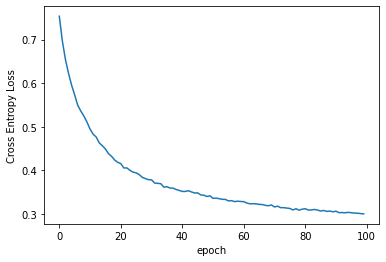

In [197]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [198]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
    
print('loss: ', loss)

loss:  tensor(0.2933)
